# Analyzing Student Attendance Patterns: A Data Analysis Study

### Sections:

* Identify Business Questions
* Collect and Store Data
* Clean and Prepare Data
* Visualise and Communicate Data

## Introduction

## Identify Business Questions

* What are the overall attendance trends throughout the school year?
* What are the overall absenteeism trends throughout the school year?
* How does the number of enrolled students compare to the number of students present or absent on a daily basis?
* Can we identify schools with consistently low attendance rates based on School DBN?

## Collect and Store Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the CSV file into a DataFrame

df = pd.read_csv("2018-2019_Daily_Attendance_20240429.csv")
df.head()

,School DBN,Date,Enrolled,Absent,Present,Released
0,01M015,20180905,172,19,153,0
1,01M015,20180906,171,17,154,0
2,01M015,20180907,172,14,158,0
3,01M015,20180912,173,7,166,0
4,01M015,20180913,173,9,164,0


## Clean and Prepare Data

In [4]:
# Display concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277153 entries, 0 to 277152
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   School DBN  277153 non-null  object
 1   Date        277153 non-null  int64 
 2   Enrolled    277153 non-null  int64 
 3   Absent      277153 non-null  int64 
 4   Present     277153 non-null  int64 
 5   Released    277153 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 12.7+ MB


In [5]:
# Convert the 'Date' column to datetime format

df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

In [6]:
df['School DBN'].nunique()

1583

In [7]:
# Display the shape of the DataFrame (number of rows, number of columns)

df.shape

(277153, 6)

In [8]:
# Generate descriptive statistics

df.describe()

,Date,Enrolled,Absent,Present,Released
count,277153,277153.00000,277153.000000,277153.000000,277153.000000
mean,2019-01-28 12:18:24.343088128,596.98617,50.503538,544.499403,1.983229
min,2018-09-04 00:00:00,1.00000,0.000000,1.000000,0.000000
25%,2018-11-13 00:00:00,329.00000,23.000000,291.000000,0.000000
50%,2019-01-29 00:00:00,476.00000,38.000000,430.000000,0.000000
75%,2019-04-10 00:00:00,684.00000,59.000000,640.000000,0.000000
max,2019-06-26 00:00:00,5955.00000,2151.000000,5847.000000,5904.000000
std,NaN,482.90966,54.329671,452.970313,35.114511


In [9]:
# Check for duplicated rows in the DataFrame

duplicated = df.duplicated()
duplicated.sum()

0

In [10]:
# Check for missing values (NaN) in the DataFrame

missing_values = df.isnull().sum()
missing_values

School DBN    0
Date          0
Enrolled      0
Absent        0
Present       0
Released      0
dtype: int64

### Summary of Data Preparation


The student daily attendance dataset was loaded into a pandas DataFrame, consisting of 277,153 entries across 6 columns:

* "School DBN" (object)
* "Date" (object)
* "Enrolled" (int64)
* "Absent" (int64)
* "Present" (int64)
* "Released" (int64)

The "Date" column was converted to datetime format for improved handling and analysis of dates.

Duplicated rows were checked for and none were found in the DataFrame.

Missing values (NaN) were verified to be absent in all columns.

Descriptive statistics were generated to understand the distribution and central tendency of numerical columns:

* Mean number of enrolled students: 597 (SD: 483)
* Mean number of absent students: 51 (SD: 54)
* Mean number of present students: 544 (SD: 453)
* Mean number of released students: 2 (SD: 35).

## Insights through Visualizations

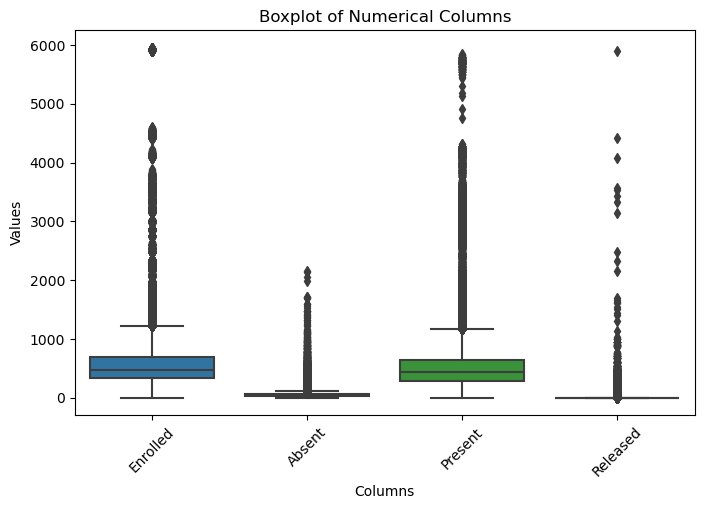

In [11]:
# Create boxplots for numerical columns

plt.figure(figsize=(8,5))
sns.boxplot(data=df.drop(['School DBN', 'Date'], axis=1))
plt.title('Boxplot of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [12]:
# Calculate quartiles and interquartile range (IQR)
quartiles = df.drop(['School DBN', 'Date'], axis=1).quantile([0.25, 0.5, 0.75])
Q1 = quartiles.loc[0.25]
Q3 = quartiles.loc[0.75]
IQR = Q3 - Q1

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Display quartiles and outliers
print("Quartiles and Outliers for Numerical Columns:")
print(quartiles)
print("\nLower Bound for Outliers:")
print(lower_bound)
print("\nUpper Bound for Outliers:")
print(upper_bound)

Quartiles and Outliers for Numerical Columns:
      Enrolled  Absent  Present  Released
0.25     329.0    23.0    291.0       0.0
0.50     476.0    38.0    430.0       0.0
0.75     684.0    59.0    640.0       0.0

Lower Bound for Outliers:
Enrolled   -203.5
Absent      -31.0
Present    -232.5
Released      0.0
dtype: float64

Upper Bound for Outliers:
Enrolled    1216.5
Absent       113.0
Present     1163.5
Released       0.0
dtype: float64


The distribution of enrolled students varies significantly, with quartiles ranging from 329 to 684. This suggests diversity in student population sizes across the dataset. The quartiles for absent and present students reveal relatively lower variability compared to enrollment. However, the presence of outliers, particularly in absent students, indicates potential instances of unusually high absenteeism in certain observations. The quartiles for released students indicate that the majority of observations report zero releases. This suggests that student releases might not be a common occurrence in the dataset, though further investigation is needed to understand the nature of releases and their implications. The presence of upper bounds for outliers highlights the potential for extreme values in enrolled, absent, and present variables. These outliers could represent exceptional cases or data entry errors that warrant closer scrutiny.

<Figure size 800x600 with 0 Axes>

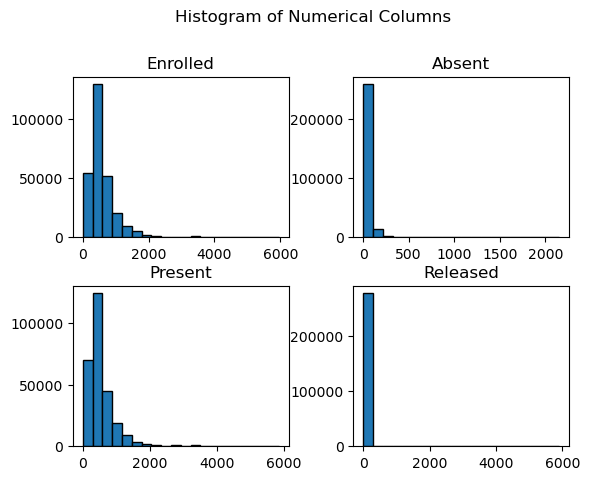

In [13]:
# Create histograms for numerical columns
plt.figure(figsize=(8,6))
df.drop(['Date','School DBN'], axis=1).hist(bins=20, edgecolor='black', grid=False)
plt.suptitle('Histogram of Numerical Columns', y=1.02)
plt.tight_layout
plt.show()

The histograms of the numerical columns reveal a consistent pattern of right skewness across the dataset. This skewness indicates that the majority of observations tend to cluster towards the lower end of the distribution, with a long tail extending towards higher values. In practical terms, this skewness suggests that certain characteristics, such as student enrollment, absenteeism, student presence, and releases, exhibit a pattern where a significant portion of observations report relatively low values, while a smaller proportion of observations account for higher values.

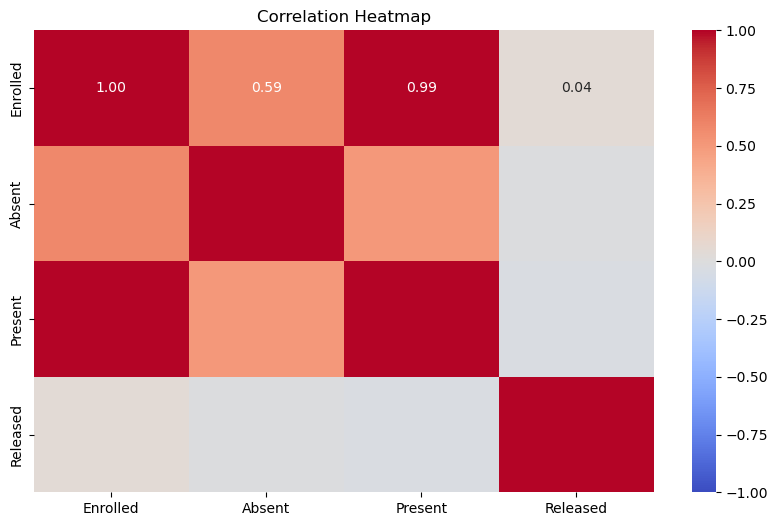

In [14]:
# Calculate correlation matrix

corr_matrix = df.drop(['School DBN', 'Date'], axis=1).corr()

# Create heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f',vmin=-1,vmax=1)
plt.title('Correlation Heatmap')
plt.show()

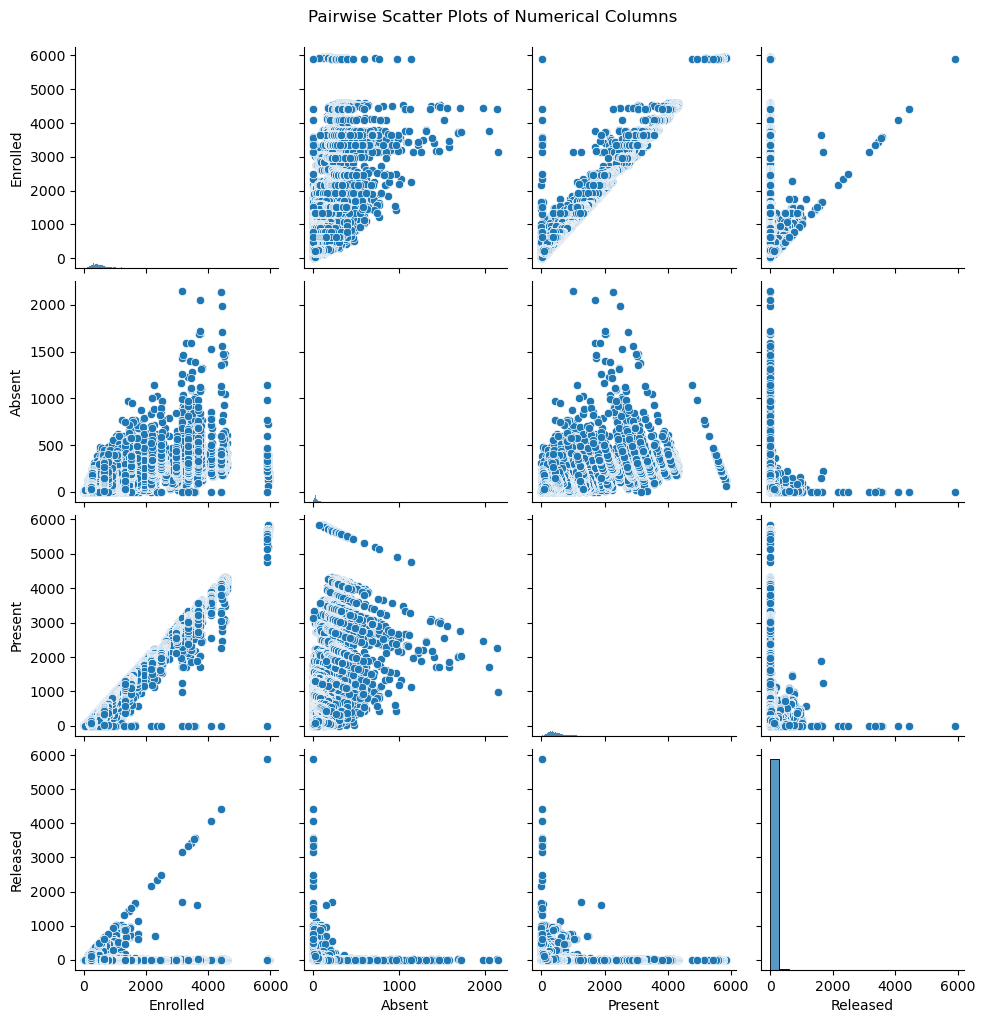

In [15]:
# Create scatter plots for pairs of numerical columns

sns.pairplot(df.drop(['School DBN', 'Date'], axis=1))
plt.suptitle('Pairwise Scatter Plots of Numerical Columns', y=1.02)
plt.show()

## What are the overall attendance trends throughout the school year?

In [16]:
# Filter the Data to only include 2018 Data
df_2018 = df[df['Date'].dt.year == 2018]

# Filter the Data to only include 2019 Data
df_2019 = df[df['Date'].dt.year == 2019]

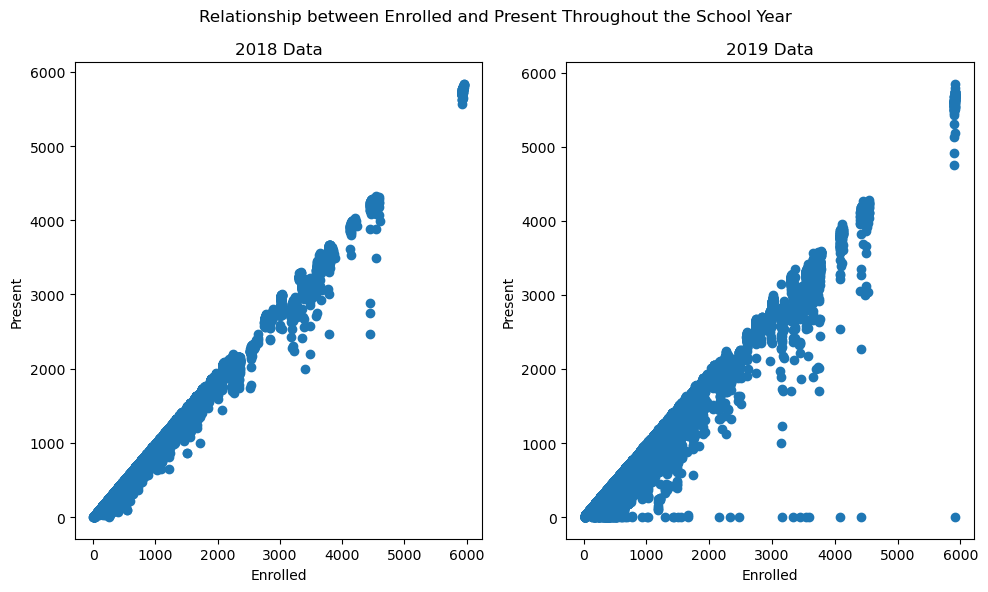

In [17]:
# Create a figure and an array of subplots
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,6))

# Plot data on the first subplot
axes[0].scatter(df_2018['Enrolled'], df_2018['Present'])
axes[0].set_title('2018 Data')
axes[0].set_xlabel('Enrolled')
axes[0].set_ylabel('Present')

# Plot data on the second subplot
axes[1].scatter(df_2019['Enrolled'], df_2019['Present'])
axes[1].set_title('2019 Data')
axes[1].set_xlabel('Enrolled')
axes[1].set_ylabel('Present')

# Add a title to the entire figure
fig.suptitle('Relationship between Enrolled and Present Throughout the School Year')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

## What are the overall absenteeism trends throughout the school year?

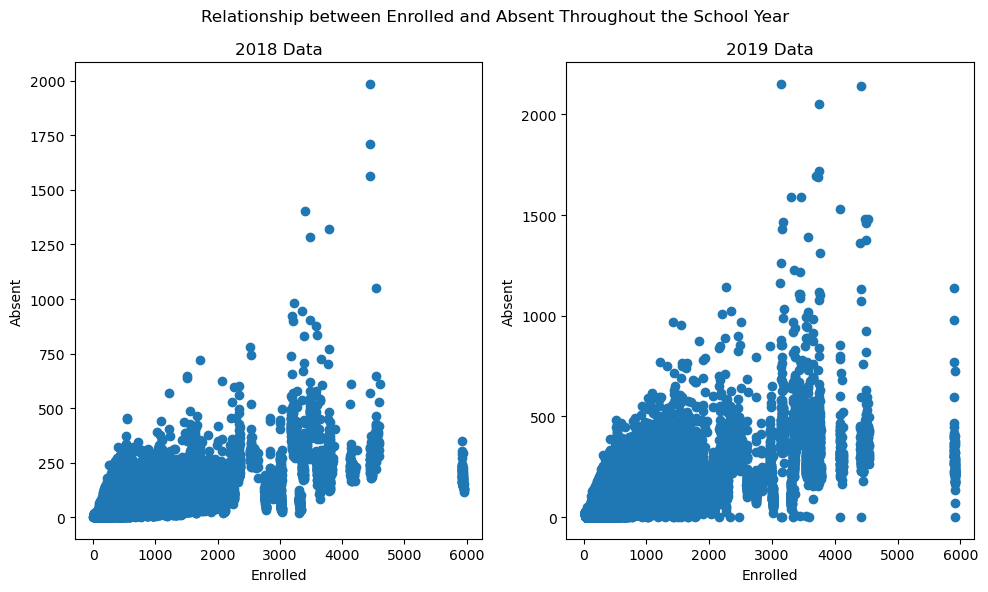

In [18]:
# Create a figure and an array of subplots
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,6))

# Plot data on the first subplot
axes[0].scatter(df_2018['Enrolled'], df_2018['Absent'])
axes[0].set_title('2018 Data')
axes[0].set_xlabel('Enrolled')
axes[0].set_ylabel('Absent')

# Plot data on the second subplot
axes[1].scatter(df_2019['Enrolled'], df_2019['Absent'])
axes[1].set_title('2019 Data')
axes[1].set_xlabel('Enrolled')
axes[1].set_ylabel('Absent')

# Add a title to the entire figure
fig.suptitle('Relationship between Enrolled and Absent Throughout the School Year')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

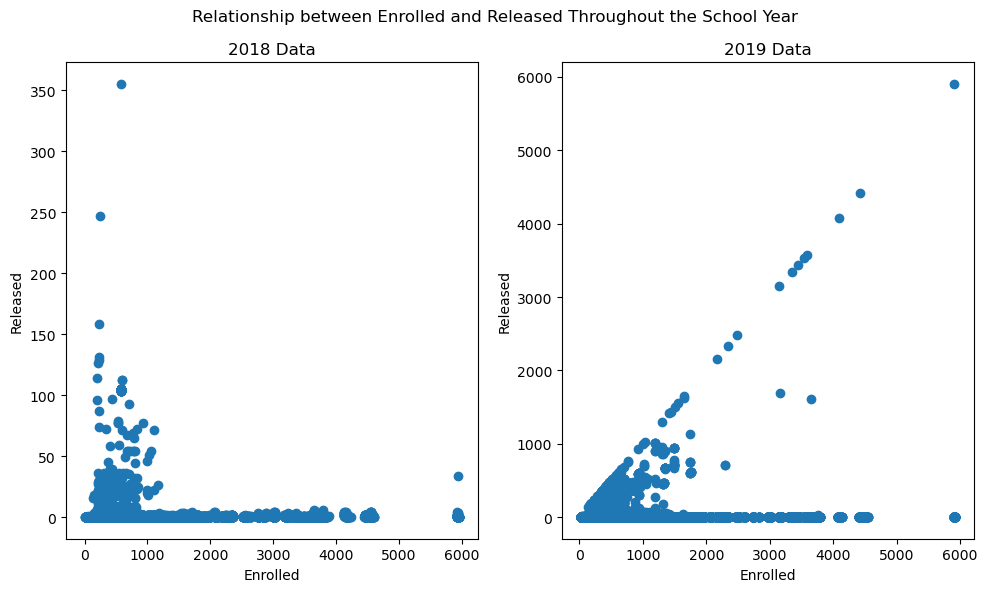

In [19]:
# Create a figure and an array of subplots
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,6))

# Plot data on the first subplot
axes[0].scatter(df_2018['Enrolled'], df_2018['Released'])
axes[0].set_title('2018 Data')
axes[0].set_xlabel('Enrolled')
axes[0].set_ylabel('Released')

# Plot data on the second subplot
axes[1].scatter(df_2019['Enrolled'], df_2019['Released'])
axes[1].set_title('2019 Data')
axes[1].set_xlabel('Enrolled')
axes[1].set_ylabel('Released')

# Add a title to the entire figure
fig.suptitle('Relationship between Enrolled and Released Throughout the School Year')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

## How does the number of enrolled students compare to the number of students present or absent on a daily basis?

To be able to view the trend of students present, absent compared to the number of enrolled students the dataset needed to be split by year. Because the dataset is so large I decided to narrow it down by year and further performing random selection to gather 5000 rows in each DataFrame

### 2018 Trends

In [61]:
n = 5000  # Specify the number of rows to select randomly
random_selection = df_2018.sample(n)

random_selection.head()

,School DBN,Date,Enrolled,Absent,Present,Released
100883,11X326,2018-11-21,407,48,359,0
68930,09X073,2018-09-17,578,54,524,0
276982,79X695,2018-09-20,150,30,120,0
226083,28Q117,2018-10-10,972,51,921,0
14208,02M312,2018-09-21,563,9,554,0


In [62]:
random_selection.drop('School DBN', axis=1,inplace=True)
random_selection = random_selection.groupby('Date').sum()

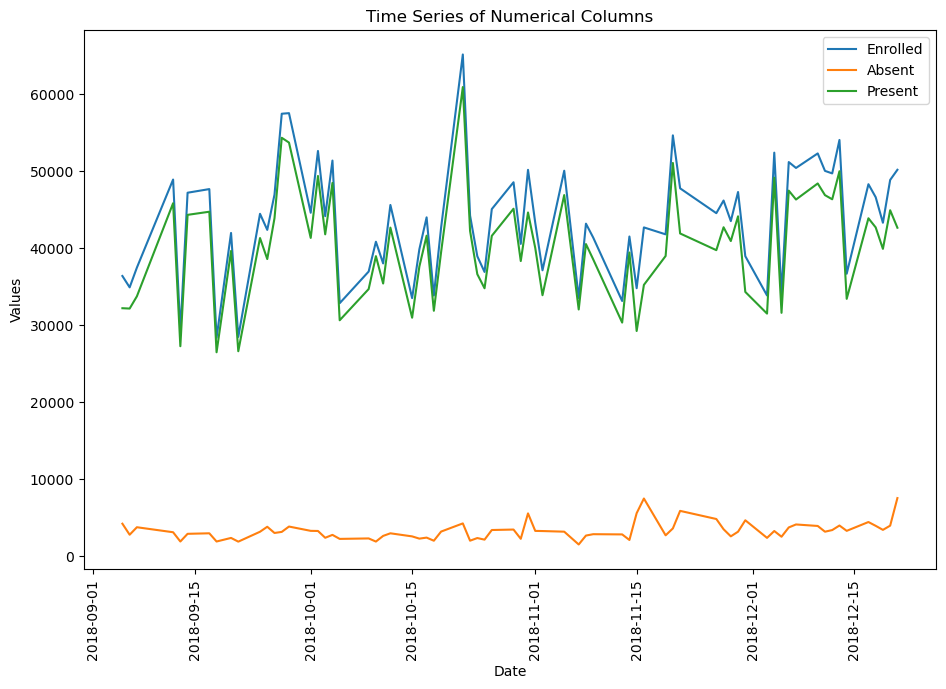

In [63]:
# Plot time series of numerical columns
plt.figure(figsize=(11, 7))
plt.plot(random_selection.index, random_selection['Enrolled'], label='Enrolled')
plt.plot(random_selection.index, random_selection['Absent'], label='Absent')
plt.plot(random_selection.index, random_selection['Present'], label='Present')
plt.title('Time Series of Numerical Columns')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Values')
plt.legend()
plt.show()

### 2019 Trends

In [73]:
n = 5000  # Specify the number of rows to select randomly
random_selection = df_2019.sample(n)

random_selection.head()

,School DBN,Date,Enrolled,Absent,Present,Released
132245,15K442,2019-06-19,303,41,262,0
107779,12X214,2019-03-01,1115,151,964,0
163659,20K104,2019-04-02,1237,18,1218,1
4864,01M839,2019-04-18,361,22,339,0
33544,04M038,2019-01-31,256,102,154,0


In [74]:
random_selection.drop('School DBN', axis=1,inplace=True)
random_selection = random_selection.groupby('Date').sum()

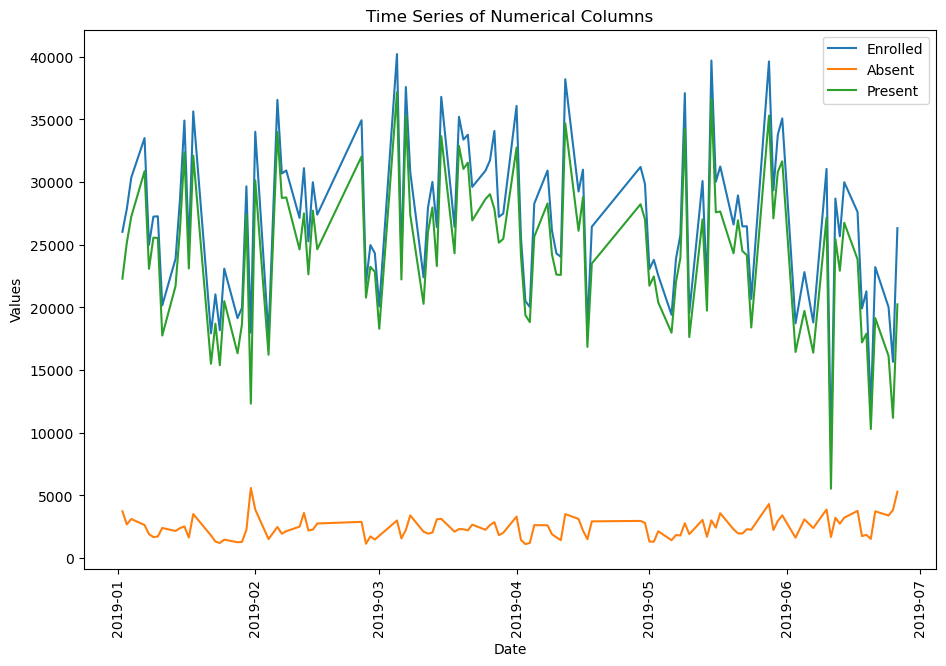

In [75]:
# Plot time series of numerical columns
plt.figure(figsize=(11, 7))
plt.plot(random_selection.index, random_selection['Enrolled'], label='Enrolled')
plt.plot(random_selection.index, random_selection['Absent'], label='Absent')
plt.plot(random_selection.index, random_selection['Present'], label='Present')
plt.title('Time Series of Numerical Columns')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Values')
plt.legend()
plt.show()

The time series analysis reveals a notable correlation between the number of enrolled students and the frequency of absent students. Fluctuations in enrollment coincide with spikes in absenteeism, suggesting a relationship between the two variables. Particularly, periods such as November-December 2018, December 2018-January 2019, January-February 2019, and June-July 2019 exhibit significant increases in both enrolled and absent students. Further statistical analysis, including correlation coefficient calculation, regression analysis, and hypothesis testing, can provide insights into the strength and significance of this correlation. Additionally, investigating underlying factors such as school events or holidays during these periods may help elucidate the observed patterns. These findings underscore the importance of understanding enrollment dynamics in relation to student absenteeism for effective educational planning and intervention strategies.

## Can we identify schools with consistently low attendance rates based on School DBN?

In [85]:
# Narrow the Dataset Down to only Include High Absentee Percentages

df['Percentage Attendees'] = (df['Absent']/df['Enrolled']) * 100

In [102]:
highest_absent = df[df['Percentage Attendees'] >= 30]
highest_absent = highest_absent[['School DBN', 'Percentage Attendees']].groupby('School DBN').mean().reset_index()

In [105]:
# Narrow it down to Above 50 percent

highest_absent = highest_absent[highest_absent['Percentage Attendees'] > 50]
highest_absent

,School DBN,Percentage Attendees
32,02M305,57.467532
33,02M308,50.839211
42,02M412,56.581967
43,02M414,57.432432
70,02M551,51.454689
71,02M560,56.137977
96,03M307,52.863306
130,04M680,52.131148
212,07X298,51.924677
221,07X495,53.503861


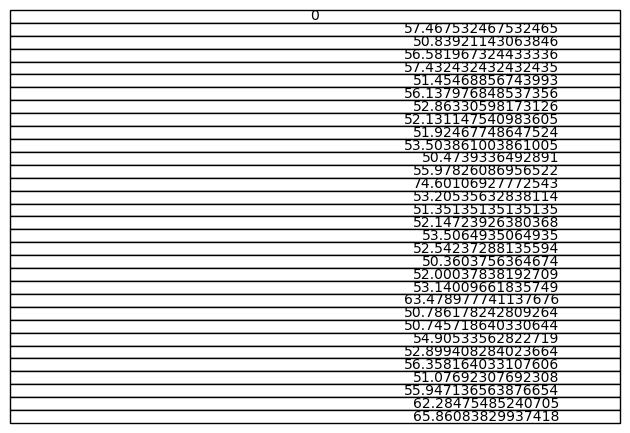

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')


table = ax.table(cellText=, loc='center')

fig.tight_layout()

plt.show()

After calculating the percentage attendance for each school, the analysis identified schools with a mean percentage absenteeism exceeding 50%. Utilizing the School DBN as a unique identifier, the mean percentage attendance for each school was computed, and those with a mean absenteeism rate above the specified threshold were filtered out. This filtering process allowed the isolation of 31 schools demonstrating a concerning trend of high absenteeism, surpassing the 50% mark. By focusing on these schools, the analysis aims to delve deeper into the underlying factors contributing to their elevated absenteeism rates and explore targeted interventions to improve attendance and student engagement.